# MARK 5828 | Week 4 | Real Beauty Advertising - Topic Modelling

![alt text](https://www.unsw.edu.au/sites/default/files/UNSW_0.png)



Topic Modelling
STEP 1 upload all data



In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import files

uploaded = files.upload()



Saving C3 Ca Ab_F 200401.txt(final).csv to C3 Ca Ab_F 200401.txt(final) (1).csv
Saving C3 Ca Ab_F 200402.txt(final).csv to C3 Ca Ab_F 200402.txt(final) (1).csv
Saving C3 Ca Ab_F 200403.txt(final).csv to C3 Ca Ab_F 200403.txt(final) (1).csv
Saving C3 Ca Ab_F 200404.txt(final).csv to C3 Ca Ab_F 200404.txt(final) (1).csv
Saving C3 Ca Ab_F 200405.txt(final).csv to C3 Ca Ab_F 200405.txt(final) (1).csv
Saving C3 Ca Ab_F 200406.txt(final).csv to C3 Ca Ab_F 200406.txt(final) (1).csv
Saving C3 Ca Ab_F 200407.txt(final).csv to C3 Ca Ab_F 200407.txt(final) (1).csv
Saving C3 Ca Ab_F 200408.txt(final).csv to C3 Ca Ab_F 200408.txt(final) (1).csv
Saving C3 Ca Ab_F 200409.txt(final).csv to C3 Ca Ab_F 200409.txt(final) (1).csv
Saving C3 Ca Ab_F 200410.txt(final).csv to C3 Ca Ab_F 200410.txt(final) (1).csv
Saving C3 Ca Ab_F 200411.txt(final).csv to C3 Ca Ab_F 200411.txt(final) (1).csv
Saving C3 Ca Ab_F 200412.txt(final).csv to C3 Ca Ab_F 200412.txt(final) (1).csv
Saving C3 Ca Ab_F 200501.txt(final).csv 

In [0]:
uploaded

{'C3 Ca Ab_F 200401.txt(final).csv': b'0,"he has even coined a word, africadian, which captures at once the beauty, isolation and quiet pride of his people."\r\n1,"the second piece, expendable beauty, which is in front of you as you enter the gallery, consists of an octagonal glass aquarium and a pair of what look like red glass shoes - like the ones dorothy wore in the wizard of oz - sitting on a pile of sand."\r\n2,"but while the company provides tidbits of note about the world of dance and features a few moments of real beauty, its absence of plot will fail to attract an audience beyond the dance community and those who worship at the altman altar."\r\n3,"the media still objectify the idea of being thin as if it were the holy grail of beauty it has been since the 1960s british fashion model twiggy, whose nickname came from her stick-like figure."\r\n4,"fifteen minutes later, fuller grabbed tara kraft, star\'s brand-new beauty director, who volunteered that one of the covers too clos

In [0]:

#get all data inside that folder into this list
data_each_month = sorted([csv for csv in uploaded.keys()])
data_each_month

['C3 Ca Ab_F 200401.txt(final).csv',
 'C3 Ca Ab_F 200402.txt(final).csv',
 'C3 Ca Ab_F 200403.txt(final).csv',
 'C3 Ca Ab_F 200404.txt(final).csv',
 'C3 Ca Ab_F 200405.txt(final).csv',
 'C3 Ca Ab_F 200406.txt(final).csv',
 'C3 Ca Ab_F 200407.txt(final).csv',
 'C3 Ca Ab_F 200408.txt(final).csv',
 'C3 Ca Ab_F 200409.txt(final).csv',
 'C3 Ca Ab_F 200410.txt(final).csv',
 'C3 Ca Ab_F 200411.txt(final).csv',
 'C3 Ca Ab_F 200412.txt(final).csv',
 'C3 Ca Ab_F 200501.txt(final).csv',
 'C3 Ca Ab_F 200502.txt(final).csv',
 'C3 Ca Ab_F 200503.txt(final).csv',
 'C3 Ca Ab_F 200504.txt(final).csv',
 'C3 Ca Ab_F 200505.txt(final).csv',
 'C3 Ca Ab_F 200506.txt(final).csv',
 'C3 Ca Ab_F 200507.txt(final).csv',
 'C3 Ca Ab_F 200508.txt(final).csv',
 'C3 Ca Ab_F 200509.txt(final).csv',
 'C3 Ca Ab_F 200510.txt(final).csv',
 'C3 Ca Ab_F 200511.txt(final).csv',
 'C3 Ca Ab_F 200512.txt(final).csv']

STEP 2 : Combine all data

In [0]:
def read_csv_files(data_each_month):
    #this is a list contains all CSV files from each month
    combined_fulldata = [] 
    for i in range(24):
        #read csv file from each month and add columns "N0" and "MONTH"
        combined_fulldata.append(pd.read_csv(data_each_month[i], encoding = "utf-8", header=None, names = ["NO", "Sentence"]))
    return combined_fulldata
  
combined_fulldata = read_csv_files(data_each_month)

#combine all CSV files inside combined_fulldata using pd.concat
CA_dataset = pd.concat(combined_fulldata)

STEP 3 CLEAN THE SENTENCE


In [0]:
import re
def remove_badwords(old_sentence):   
 #function to remove unneeded words           
  try:
    old_sentence = re.sub(r"beauty","", old_sentence)
    old_sentence = re.sub(r"full text:","", old_sentence)
    old_sentence = re.sub(r"dove","dovevod", old_sentence)
    old_sentence = re.sub(r"make-up","makeup", old_sentence)
    old_sentence = re.sub(r"self-esteem","selfesteem",  old_sentence)
    old_sentence = re.sub(r"advertis","ad", old_sentence)
    old_sentence = re.sub(r"illustration","", old_sentence)
    old_sentence = re.sub(r"photo:","", old_sentence)
    old_sentence = re.sub(r"illustration photo:","",old_sentence)
    old_sentence = re.sub(r"illustration caption:","",old_sentence)
    old_sentence = re.sub(r"photographer:","",old_sentence)
    old_sentence = re.sub(r"photo (color):","",old_sentence)
    old_sentence = re.sub(r"caption:","",old_sentence)
    old_sentence = re.sub(r"credit:","",old_sentence)
    old_sentence = re.sub(r"styling:","",old_sentence)
    new_sentence = re.sub(r"therapist","therapy", old_sentence)
                
      #Sometimes there is no sentence in a row, so we just give a new sentence "empty string"
  except:
    new_sentence = "empty string"
  return new_sentence
       
#create new column for all sentences after we clean them in function remove_beauty
CA_dataset['Sentence Cleaned']=CA_dataset["Sentence"].apply(remove_badwords)

STEP 4 TOKENIZE THE SENTENCE

In [0]:
import spacy
def tokenise_sentence(all_sentences):
  
# clean the sentence from stopwords, punctuation and stemming each words from all sentence.
 
  #load the NLP library
  nlp = spacy.load("en", disable = ['tagger', 'parser', 'ner'])
        
  #get stopwords from Spacy
  full_stopwords = set(nlp.Defaults.stop_words)
        
  #customise our stopwords
  our_stopwords = full_stopwords.difference({"whole","yourself","myself","beyond","every","behind","more", "than", "beyond", "all", "many", "not", "just"})
        
  #list to collect all sentence after they are lemmetized
  all_tokenise_sentence = []
  
  #process each sentence 
  for sentence in all_sentences:
  
  #list to get the root words
    tokenise_sentence = []
  
  #lemmetize each word from a sentence
    for this_word in nlp(sentence):
     
      #delete this word if it is a stopword 
      if this_word in our_stopwords:
        continue
      
      #delete this word if it is a punctuation or a number
      elif this_word.is_punct or not(this_word.is_alpha):
        continue
      
      #delete this word if its base form is a stop word
      elif (this_word.lemma_) in our_stopwords:
        continue
      
      #delete this word if it's less then 2 or more than 20 in length
      elif len(str(this_word.lemma_))<2 or len(str(this_word.lemma_))>20:
        continue
      
      elif (this_word.lemma_) == ("-PRON-"):
        continue
      
      else:
        #convert this word into its base form and insert it into our tokenise_sentence
        tokenise_sentence.append(this_word.lemma_)
    
    #after all words have been converted into their base form, insert it into our list
    all_tokenise_sentence.append(tokenise_sentence)
            
       
  return all_tokenise_sentence



In [0]:
#get all sentences
all_sentences = CA_dataset['Sentence Cleaned'].values

#convert into token 
all_tokenise_sentences = tokenise_sentence(all_sentences)
        

STEP 5 . count all frequency of all words in each sentence using CountVector

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

X = pd.Series(all_tokenise_sentences)
count = CountVectorizer(lowercase = False, tokenizer = lambda x: x, min_df = 2, encoding="utf-8")
count.fit(X)

#get the document term matrix 
dtm = count.transform(X)

STEP 6: Create the LDA model

In [0]:
!pip install LDA

  Using cached https://files.pythonhosted.org/packages/0c/5d/b077dbf309993d52c1d71e6bf6fe443a8029ea215135ebbe0b1b10e7aefc/pbr-3.1.1-py2.py3-none-any.whl
  Found existing installation: pbr 5.1.2
    Uninstalling pbr-5.1.2:
      Successfully uninstalled pbr-5.1.2


In [0]:
from lda import LDA

In [0]:
import lda
#LDA model from LDA package

#set number of topics
n_topics = 3
model = LDA(n_topics=n_topics)
            
#fit our document term matrix into LDA model
model.fit_transform(dtm)

INFO:lda:n_documents: 5427
INFO:lda:vocab_size: 6085
INFO:lda:n_words: 63300
INFO:lda:n_topics: 3
INFO:lda:n_iter: 2000
/usr/local/lib/python3.6/dist-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -644192
INFO:lda:<10> log likelihood: -545789
INFO:lda:<20> log likelihood: -538403
INFO:lda:<30> log likelihood: -535879
INFO:lda:<40> log likelihood: -533905
INFO:lda:<50> log likelihood: -533015
INFO:lda:<60> log likelihood: -531883
INFO:lda:<70> log likelihood: -531215
INFO:lda:<80> log likelihood: -530320
INFO:lda:<90> log likelihood: -530015
INFO:lda:<100> log likelihood: -529393
INFO:lda:<110> log likelihood: -529211
INFO:lda:<120> log likelihood: -529079
INFO:lda:<130> log likelihood: -528427
INFO:lda:<140> log likelihood: -528628
INFO:lda:<150> l

array([[0.28767123, 0.69863014, 0.01369863],
       [0.00546448, 0.33333333, 0.66120219],
       [0.57512953, 0.41968912, 0.00518135],
       ...,
       [0.42657343, 0.56643357, 0.00699301],
       [0.01587302, 0.65079365, 0.33333333],
       [0.00813008, 0.33333333, 0.65853659]])

STEP 7: get the topics

In [0]:
#get the words in each topic
topic_word = model.components_  # model.components_ also works
topwords_dict = dict()

#get_all_words from document_term_matrix
vocab = count.get_feature_names()

#set how many words do you want to get
n_top_words = 8

#enumerate each topic
for topic_number, all_words_in_this_topic in enumerate(topic_word):

  #sort the index of all words in each topic 
  sort_all_words = np.argsort(all_words_in_this_topic)[::-1]
  
  #get the index of top words[:n_top_words]
  sort_top_words = sort_all_words[:n_top_words]
           
  #get top words
  top_words = np.array(vocab)[sort_top_words]
  
  #print each topic
  print('Topic {}: {}'.format(topic_number+1, ' '.join(top_words)))
  topwords_dict["Topic "+str(topic_number+1)]= ','.join(top_words)   



Topic 0: woman not pageant dovevod real all contest model
Topic 1: beast woman stage all play love art not
Topic 2: shop colour queen product new hair salon look


{'Topic 0': 'woman,not,pageant,dovevod,real,all,contest,model',
 'Topic 1': 'beast,woman,stage,all,play,love,art,not',
 'Topic 2': 'shop,colour,queen,product,new,hair,salon,look'}

STEP 8: Find optimum number of topics using LogLikehood score

In [0]:
#create list to collect all LogLikehoodscore
loglikehood_lda = list()

#find optimum number of topics from 1-31
for n_topics in range(1,31):
    model = LDA(n_topics=n_topics)
    model.fit_transform(dtm)
    print(str(n_topics)+".... "+str(round(model.loglikelihood(),2)))
    loglikehood_lda.append(round(model.loglikelihood(),2))

INFO:lda:n_documents: 5427
INFO:lda:vocab_size: 6085
INFO:lda:n_words: 63300
INFO:lda:n_topics: 1
INFO:lda:n_iter: 2000
/usr/local/lib/python3.6/dist-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -525150
INFO:lda:<10> log likelihood: -525150
INFO:lda:<20> log likelihood: -525150
INFO:lda:<30> log likelihood: -525150
INFO:lda:<40> log likelihood: -525150
INFO:lda:<50> log likelihood: -525150
INFO:lda:<60> log likelihood: -525150
INFO:lda:<70> log likelihood: -525150
INFO:lda:<80> log likelihood: -525150
INFO:lda:<90> log likelihood: -525150
INFO:lda:<100> log likelihood: -525150
INFO:lda:<110> log likelihood: -525150
INFO:lda:<120> log likelihood: -525150
INFO:lda:<130> log likelihood: -525150
INFO:lda:<140> log likelihood: -525150
INFO:lda:<150> l

1.... -525150.35


INFO:lda:<0> log likelihood: -598174
INFO:lda:<10> log likelihood: -540196
INFO:lda:<20> log likelihood: -535808
INFO:lda:<30> log likelihood: -534260
INFO:lda:<40> log likelihood: -532935
INFO:lda:<50> log likelihood: -532244
INFO:lda:<60> log likelihood: -531665
INFO:lda:<70> log likelihood: -531229
INFO:lda:<80> log likelihood: -530501
INFO:lda:<90> log likelihood: -530417
INFO:lda:<100> log likelihood: -529784
INFO:lda:<110> log likelihood: -529644
INFO:lda:<120> log likelihood: -529609
INFO:lda:<130> log likelihood: -529144
INFO:lda:<140> log likelihood: -529147
INFO:lda:<150> log likelihood: -528880
INFO:lda:<160> log likelihood: -528839
INFO:lda:<170> log likelihood: -528677
INFO:lda:<180> log likelihood: -528641
INFO:lda:<190> log likelihood: -528436
INFO:lda:<200> log likelihood: -528443
INFO:lda:<210> log likelihood: -528430
INFO:lda:<220> log likelihood: -528306
INFO:lda:<230> log likelihood: -528419
INFO:lda:<240> log likelihood: -528114
INFO:lda:<250> log likelihood: -5282

2.... -526863.14


INFO:lda:<0> log likelihood: -644192
INFO:lda:<10> log likelihood: -547268
INFO:lda:<20> log likelihood: -541493
INFO:lda:<30> log likelihood: -538310
INFO:lda:<40> log likelihood: -536577
INFO:lda:<50> log likelihood: -535196
INFO:lda:<60> log likelihood: -534446
INFO:lda:<70> log likelihood: -532858
INFO:lda:<80> log likelihood: -532497
INFO:lda:<90> log likelihood: -531982
INFO:lda:<100> log likelihood: -531569
INFO:lda:<110> log likelihood: -531247
INFO:lda:<120> log likelihood: -530709
INFO:lda:<130> log likelihood: -530410
INFO:lda:<140> log likelihood: -530135
INFO:lda:<150> log likelihood: -529790
INFO:lda:<160> log likelihood: -529733
INFO:lda:<170> log likelihood: -529554
INFO:lda:<180> log likelihood: -529474
INFO:lda:<190> log likelihood: -529473
INFO:lda:<200> log likelihood: -529544
INFO:lda:<210> log likelihood: -529207
INFO:lda:<220> log likelihood: -529000
INFO:lda:<230> log likelihood: -528938
INFO:lda:<240> log likelihood: -528935
INFO:lda:<250> log likelihood: -5290

3.... -525447.59


INFO:lda:<0> log likelihood: -679028
INFO:lda:<10> log likelihood: -549647
INFO:lda:<20> log likelihood: -541795
INFO:lda:<30> log likelihood: -539172
INFO:lda:<40> log likelihood: -537169
INFO:lda:<50> log likelihood: -535427
INFO:lda:<60> log likelihood: -534384
INFO:lda:<70> log likelihood: -533336
INFO:lda:<80> log likelihood: -532506
INFO:lda:<90> log likelihood: -532067
INFO:lda:<100> log likelihood: -531920
INFO:lda:<110> log likelihood: -531232
INFO:lda:<120> log likelihood: -530993
INFO:lda:<130> log likelihood: -530898
INFO:lda:<140> log likelihood: -530797
INFO:lda:<150> log likelihood: -530181
INFO:lda:<160> log likelihood: -529978
INFO:lda:<170> log likelihood: -529664
INFO:lda:<180> log likelihood: -529247
INFO:lda:<190> log likelihood: -529067
INFO:lda:<200> log likelihood: -528738
INFO:lda:<210> log likelihood: -528791
INFO:lda:<220> log likelihood: -528440
INFO:lda:<230> log likelihood: -528169
INFO:lda:<240> log likelihood: -528037
INFO:lda:<250> log likelihood: -5277

4.... -522860.18


INFO:lda:<0> log likelihood: -705707
INFO:lda:<10> log likelihood: -552387
INFO:lda:<20> log likelihood: -542863
INFO:lda:<30> log likelihood: -539216
INFO:lda:<40> log likelihood: -536484
INFO:lda:<50> log likelihood: -534501
INFO:lda:<60> log likelihood: -533091
INFO:lda:<70> log likelihood: -531617
INFO:lda:<80> log likelihood: -530999
INFO:lda:<90> log likelihood: -530089
INFO:lda:<100> log likelihood: -529496
INFO:lda:<110> log likelihood: -528866
INFO:lda:<120> log likelihood: -528291
INFO:lda:<130> log likelihood: -528073
INFO:lda:<140> log likelihood: -527573
INFO:lda:<150> log likelihood: -527284
INFO:lda:<160> log likelihood: -527306
INFO:lda:<170> log likelihood: -526808
INFO:lda:<180> log likelihood: -526852
INFO:lda:<190> log likelihood: -526421
INFO:lda:<200> log likelihood: -526267
INFO:lda:<210> log likelihood: -526181
INFO:lda:<220> log likelihood: -526329
INFO:lda:<230> log likelihood: -525680
INFO:lda:<240> log likelihood: -526034
INFO:lda:<250> log likelihood: -5256

5.... -521252.39


INFO:lda:<0> log likelihood: -728885
INFO:lda:<10> log likelihood: -553025
INFO:lda:<20> log likelihood: -542774
INFO:lda:<30> log likelihood: -538290
INFO:lda:<40> log likelihood: -535301
INFO:lda:<50> log likelihood: -533057
INFO:lda:<60> log likelihood: -531847
INFO:lda:<70> log likelihood: -530196
INFO:lda:<80> log likelihood: -529315
INFO:lda:<90> log likelihood: -528497
INFO:lda:<100> log likelihood: -527477
INFO:lda:<110> log likelihood: -527439
INFO:lda:<120> log likelihood: -527056
INFO:lda:<130> log likelihood: -526569
INFO:lda:<140> log likelihood: -526121
INFO:lda:<150> log likelihood: -525565
INFO:lda:<160> log likelihood: -525316
INFO:lda:<170> log likelihood: -525543
INFO:lda:<180> log likelihood: -524834
INFO:lda:<190> log likelihood: -524784
INFO:lda:<200> log likelihood: -524472
INFO:lda:<210> log likelihood: -524467
INFO:lda:<220> log likelihood: -524383
INFO:lda:<230> log likelihood: -524069
INFO:lda:<240> log likelihood: -524313
INFO:lda:<250> log likelihood: -5240

6.... -520259.47


INFO:lda:<0> log likelihood: -749118
INFO:lda:<10> log likelihood: -553530
INFO:lda:<20> log likelihood: -542386
INFO:lda:<30> log likelihood: -537067
INFO:lda:<40> log likelihood: -534027
INFO:lda:<50> log likelihood: -531618
INFO:lda:<60> log likelihood: -530069
INFO:lda:<70> log likelihood: -529089
INFO:lda:<80> log likelihood: -527772
INFO:lda:<90> log likelihood: -527564
INFO:lda:<100> log likelihood: -527384
INFO:lda:<110> log likelihood: -526184
INFO:lda:<120> log likelihood: -526476
INFO:lda:<130> log likelihood: -525588
INFO:lda:<140> log likelihood: -525737
INFO:lda:<150> log likelihood: -524874
INFO:lda:<160> log likelihood: -525154
INFO:lda:<170> log likelihood: -524717
INFO:lda:<180> log likelihood: -524265
INFO:lda:<190> log likelihood: -524439
INFO:lda:<200> log likelihood: -523806
INFO:lda:<210> log likelihood: -523770
INFO:lda:<220> log likelihood: -523790
INFO:lda:<230> log likelihood: -523833
INFO:lda:<240> log likelihood: -523613
INFO:lda:<250> log likelihood: -5235

7.... -519913.17


INFO:lda:<0> log likelihood: -763876
INFO:lda:<10> log likelihood: -553351
INFO:lda:<20> log likelihood: -541491
INFO:lda:<30> log likelihood: -537032
INFO:lda:<40> log likelihood: -533917
INFO:lda:<50> log likelihood: -532118
INFO:lda:<60> log likelihood: -530379
INFO:lda:<70> log likelihood: -529208
INFO:lda:<80> log likelihood: -528253
INFO:lda:<90> log likelihood: -527518
INFO:lda:<100> log likelihood: -526529
INFO:lda:<110> log likelihood: -526256
INFO:lda:<120> log likelihood: -525734
INFO:lda:<130> log likelihood: -525822
INFO:lda:<140> log likelihood: -524790
INFO:lda:<150> log likelihood: -525109
INFO:lda:<160> log likelihood: -524490
INFO:lda:<170> log likelihood: -524106
INFO:lda:<180> log likelihood: -523732
INFO:lda:<190> log likelihood: -523544
INFO:lda:<200> log likelihood: -523706
INFO:lda:<210> log likelihood: -523477
INFO:lda:<220> log likelihood: -523245
INFO:lda:<230> log likelihood: -523293
INFO:lda:<240> log likelihood: -522897
INFO:lda:<250> log likelihood: -5227

8.... -518797.87


INFO:lda:<0> log likelihood: -777367
INFO:lda:<10> log likelihood: -554143
INFO:lda:<20> log likelihood: -542238
INFO:lda:<30> log likelihood: -536784
INFO:lda:<40> log likelihood: -532769
INFO:lda:<50> log likelihood: -530278
INFO:lda:<60> log likelihood: -528988
INFO:lda:<70> log likelihood: -527109
INFO:lda:<80> log likelihood: -525577
INFO:lda:<90> log likelihood: -524799
INFO:lda:<100> log likelihood: -524030
INFO:lda:<110> log likelihood: -523268
INFO:lda:<120> log likelihood: -522953
INFO:lda:<130> log likelihood: -522535
INFO:lda:<140> log likelihood: -522469
INFO:lda:<150> log likelihood: -521912
INFO:lda:<160> log likelihood: -521791
INFO:lda:<170> log likelihood: -521309
INFO:lda:<180> log likelihood: -521614
INFO:lda:<190> log likelihood: -521268
INFO:lda:<200> log likelihood: -521246
INFO:lda:<210> log likelihood: -520748
INFO:lda:<220> log likelihood: -520222
INFO:lda:<230> log likelihood: -520344
INFO:lda:<240> log likelihood: -520258
INFO:lda:<250> log likelihood: -5200

9.... -516193.94


INFO:lda:<0> log likelihood: -790305
INFO:lda:<10> log likelihood: -554691
INFO:lda:<20> log likelihood: -543303
INFO:lda:<30> log likelihood: -537993
INFO:lda:<40> log likelihood: -534331
INFO:lda:<50> log likelihood: -532305
INFO:lda:<60> log likelihood: -530884
INFO:lda:<70> log likelihood: -529100
INFO:lda:<80> log likelihood: -528625
INFO:lda:<90> log likelihood: -527616
INFO:lda:<100> log likelihood: -526578
INFO:lda:<110> log likelihood: -525761
INFO:lda:<120> log likelihood: -525310
INFO:lda:<130> log likelihood: -524399
INFO:lda:<140> log likelihood: -524631
INFO:lda:<150> log likelihood: -523967
INFO:lda:<160> log likelihood: -523535
INFO:lda:<170> log likelihood: -523216
INFO:lda:<180> log likelihood: -523059
INFO:lda:<190> log likelihood: -522987
INFO:lda:<200> log likelihood: -522928
INFO:lda:<210> log likelihood: -522118
INFO:lda:<220> log likelihood: -522490
INFO:lda:<230> log likelihood: -522273
INFO:lda:<240> log likelihood: -522231
INFO:lda:<250> log likelihood: -5216

10.... -517374.76


INFO:lda:<0> log likelihood: -801527
INFO:lda:<10> log likelihood: -555005
INFO:lda:<20> log likelihood: -542113
INFO:lda:<30> log likelihood: -536608
INFO:lda:<40> log likelihood: -532911
INFO:lda:<50> log likelihood: -530400
INFO:lda:<60> log likelihood: -528990
INFO:lda:<70> log likelihood: -528356
INFO:lda:<80> log likelihood: -526618
INFO:lda:<90> log likelihood: -525999
INFO:lda:<100> log likelihood: -525171
INFO:lda:<110> log likelihood: -524976
INFO:lda:<120> log likelihood: -524350
INFO:lda:<130> log likelihood: -524144
INFO:lda:<140> log likelihood: -523289
INFO:lda:<150> log likelihood: -523372
INFO:lda:<160> log likelihood: -522852
INFO:lda:<170> log likelihood: -522850
INFO:lda:<180> log likelihood: -521826
INFO:lda:<190> log likelihood: -521813
INFO:lda:<200> log likelihood: -521942
INFO:lda:<210> log likelihood: -521456
INFO:lda:<220> log likelihood: -521848
INFO:lda:<230> log likelihood: -521301
INFO:lda:<240> log likelihood: -521411
INFO:lda:<250> log likelihood: -5208

11.... -516198.38


INFO:lda:<0> log likelihood: -811398
INFO:lda:<10> log likelihood: -555605
INFO:lda:<20> log likelihood: -541618
INFO:lda:<30> log likelihood: -535971
INFO:lda:<40> log likelihood: -532987
INFO:lda:<50> log likelihood: -530809
INFO:lda:<60> log likelihood: -529260
INFO:lda:<70> log likelihood: -527962
INFO:lda:<80> log likelihood: -526990
INFO:lda:<90> log likelihood: -525667
INFO:lda:<100> log likelihood: -524523
INFO:lda:<110> log likelihood: -523883
INFO:lda:<120> log likelihood: -523540
INFO:lda:<130> log likelihood: -523119
INFO:lda:<140> log likelihood: -522701
INFO:lda:<150> log likelihood: -522278
INFO:lda:<160> log likelihood: -521863
INFO:lda:<170> log likelihood: -521795
INFO:lda:<180> log likelihood: -521662
INFO:lda:<190> log likelihood: -521087
INFO:lda:<200> log likelihood: -521122
INFO:lda:<210> log likelihood: -520943
INFO:lda:<220> log likelihood: -520466
INFO:lda:<230> log likelihood: -520746
INFO:lda:<240> log likelihood: -520775
INFO:lda:<250> log likelihood: -5202

12.... -514553.67


INFO:lda:<0> log likelihood: -820137
INFO:lda:<10> log likelihood: -554538
INFO:lda:<20> log likelihood: -540630
INFO:lda:<30> log likelihood: -534760
INFO:lda:<40> log likelihood: -531192
INFO:lda:<50> log likelihood: -528976
INFO:lda:<60> log likelihood: -527350
INFO:lda:<70> log likelihood: -526397
INFO:lda:<80> log likelihood: -525113
INFO:lda:<90> log likelihood: -524363
INFO:lda:<100> log likelihood: -524102
INFO:lda:<110> log likelihood: -523074
INFO:lda:<120> log likelihood: -522615
INFO:lda:<130> log likelihood: -521932
INFO:lda:<140> log likelihood: -521694
INFO:lda:<150> log likelihood: -521382
INFO:lda:<160> log likelihood: -521391
INFO:lda:<170> log likelihood: -520782
INFO:lda:<180> log likelihood: -520424
INFO:lda:<190> log likelihood: -520831
INFO:lda:<200> log likelihood: -519827
INFO:lda:<210> log likelihood: -519793
INFO:lda:<220> log likelihood: -520087
INFO:lda:<230> log likelihood: -519782
INFO:lda:<240> log likelihood: -519461
INFO:lda:<250> log likelihood: -5191

13.... -515013.57


INFO:lda:<0> log likelihood: -827652
INFO:lda:<10> log likelihood: -555987
INFO:lda:<20> log likelihood: -542472
INFO:lda:<30> log likelihood: -536129
INFO:lda:<40> log likelihood: -532907
INFO:lda:<50> log likelihood: -530515
INFO:lda:<60> log likelihood: -528796
INFO:lda:<70> log likelihood: -526961
INFO:lda:<80> log likelihood: -525770
INFO:lda:<90> log likelihood: -524790
INFO:lda:<100> log likelihood: -523513
INFO:lda:<110> log likelihood: -523062
INFO:lda:<120> log likelihood: -522098
INFO:lda:<130> log likelihood: -522091
INFO:lda:<140> log likelihood: -522230
INFO:lda:<150> log likelihood: -521274
INFO:lda:<160> log likelihood: -520868
INFO:lda:<170> log likelihood: -520574
INFO:lda:<180> log likelihood: -520820
INFO:lda:<190> log likelihood: -520318
INFO:lda:<200> log likelihood: -520433
INFO:lda:<210> log likelihood: -519956
INFO:lda:<220> log likelihood: -519735
INFO:lda:<230> log likelihood: -519534
INFO:lda:<240> log likelihood: -519693
INFO:lda:<250> log likelihood: -5196

14.... -514717.64


INFO:lda:<0> log likelihood: -833232
INFO:lda:<10> log likelihood: -556551
INFO:lda:<20> log likelihood: -542774
INFO:lda:<30> log likelihood: -535916
INFO:lda:<40> log likelihood: -532479
INFO:lda:<50> log likelihood: -530350
INFO:lda:<60> log likelihood: -529055
INFO:lda:<70> log likelihood: -527194
INFO:lda:<80> log likelihood: -525882
INFO:lda:<90> log likelihood: -525017
INFO:lda:<100> log likelihood: -524184
INFO:lda:<110> log likelihood: -523077
INFO:lda:<120> log likelihood: -522471
INFO:lda:<130> log likelihood: -522146
INFO:lda:<140> log likelihood: -521575
INFO:lda:<150> log likelihood: -520593
INFO:lda:<160> log likelihood: -520214
INFO:lda:<170> log likelihood: -520093
INFO:lda:<180> log likelihood: -520215
INFO:lda:<190> log likelihood: -519884
INFO:lda:<200> log likelihood: -519484
INFO:lda:<210> log likelihood: -519076
INFO:lda:<220> log likelihood: -519369
INFO:lda:<230> log likelihood: -519352
INFO:lda:<240> log likelihood: -518834
INFO:lda:<250> log likelihood: -5187

15.... -514445.56


INFO:lda:<0> log likelihood: -838971
INFO:lda:<10> log likelihood: -555984
INFO:lda:<20> log likelihood: -541861
INFO:lda:<30> log likelihood: -535815
INFO:lda:<40> log likelihood: -531806
INFO:lda:<50> log likelihood: -529054
INFO:lda:<60> log likelihood: -527737
INFO:lda:<70> log likelihood: -526521
INFO:lda:<80> log likelihood: -525794
INFO:lda:<90> log likelihood: -523884
INFO:lda:<100> log likelihood: -523558
INFO:lda:<110> log likelihood: -523288
INFO:lda:<120> log likelihood: -522767
INFO:lda:<130> log likelihood: -521884
INFO:lda:<140> log likelihood: -521880
INFO:lda:<150> log likelihood: -520918
INFO:lda:<160> log likelihood: -520481
INFO:lda:<170> log likelihood: -520460
INFO:lda:<180> log likelihood: -520524
INFO:lda:<190> log likelihood: -520121
INFO:lda:<200> log likelihood: -519178
INFO:lda:<210> log likelihood: -519155
INFO:lda:<220> log likelihood: -519786
INFO:lda:<230> log likelihood: -519304
INFO:lda:<240> log likelihood: -518888
INFO:lda:<250> log likelihood: -5188

16.... -514169.25


INFO:lda:<0> log likelihood: -844975
INFO:lda:<10> log likelihood: -556904
INFO:lda:<20> log likelihood: -541719
INFO:lda:<30> log likelihood: -535018
INFO:lda:<40> log likelihood: -532687
INFO:lda:<50> log likelihood: -530032
INFO:lda:<60> log likelihood: -528534
INFO:lda:<70> log likelihood: -526559
INFO:lda:<80> log likelihood: -525373
INFO:lda:<90> log likelihood: -524926
INFO:lda:<100> log likelihood: -524066
INFO:lda:<110> log likelihood: -523148
INFO:lda:<120> log likelihood: -522547
INFO:lda:<130> log likelihood: -522089
INFO:lda:<140> log likelihood: -521666
INFO:lda:<150> log likelihood: -521026
INFO:lda:<160> log likelihood: -520998
INFO:lda:<170> log likelihood: -520338
INFO:lda:<180> log likelihood: -520005
INFO:lda:<190> log likelihood: -519825
INFO:lda:<200> log likelihood: -519476
INFO:lda:<210> log likelihood: -519331
INFO:lda:<220> log likelihood: -518867
INFO:lda:<230> log likelihood: -519086
INFO:lda:<240> log likelihood: -518733
INFO:lda:<250> log likelihood: -5189

17.... -513500.3


INFO:lda:<0> log likelihood: -848279
INFO:lda:<10> log likelihood: -556253
INFO:lda:<20> log likelihood: -541275
INFO:lda:<30> log likelihood: -535016
INFO:lda:<40> log likelihood: -531518
INFO:lda:<50> log likelihood: -529548
INFO:lda:<60> log likelihood: -526899
INFO:lda:<70> log likelihood: -526003
INFO:lda:<80> log likelihood: -524615
INFO:lda:<90> log likelihood: -523533
INFO:lda:<100> log likelihood: -523443
INFO:lda:<110> log likelihood: -521985
INFO:lda:<120> log likelihood: -521460
INFO:lda:<130> log likelihood: -521312
INFO:lda:<140> log likelihood: -520969
INFO:lda:<150> log likelihood: -520570
INFO:lda:<160> log likelihood: -519906
INFO:lda:<170> log likelihood: -519853
INFO:lda:<180> log likelihood: -519679
INFO:lda:<190> log likelihood: -519562
INFO:lda:<200> log likelihood: -519365
INFO:lda:<210> log likelihood: -518939
INFO:lda:<220> log likelihood: -518713
INFO:lda:<230> log likelihood: -518398
INFO:lda:<240> log likelihood: -518245
INFO:lda:<250> log likelihood: -5182

18.... -513889.46


INFO:lda:<0> log likelihood: -851042
INFO:lda:<10> log likelihood: -558469
INFO:lda:<20> log likelihood: -542695
INFO:lda:<30> log likelihood: -536629
INFO:lda:<40> log likelihood: -532938
INFO:lda:<50> log likelihood: -530064
INFO:lda:<60> log likelihood: -528002
INFO:lda:<70> log likelihood: -525979
INFO:lda:<80> log likelihood: -524357
INFO:lda:<90> log likelihood: -523523
INFO:lda:<100> log likelihood: -522497
INFO:lda:<110> log likelihood: -522021
INFO:lda:<120> log likelihood: -520562
INFO:lda:<130> log likelihood: -520463
INFO:lda:<140> log likelihood: -520191
INFO:lda:<150> log likelihood: -519003
INFO:lda:<160> log likelihood: -519479
INFO:lda:<170> log likelihood: -519219
INFO:lda:<180> log likelihood: -518106
INFO:lda:<190> log likelihood: -518004
INFO:lda:<200> log likelihood: -517312
INFO:lda:<210> log likelihood: -517552
INFO:lda:<220> log likelihood: -517560
INFO:lda:<230> log likelihood: -516908
INFO:lda:<240> log likelihood: -516497
INFO:lda:<250> log likelihood: -5169

19.... -513505.02


INFO:lda:<0> log likelihood: -855729
INFO:lda:<10> log likelihood: -557610
INFO:lda:<20> log likelihood: -542184
INFO:lda:<30> log likelihood: -535212
INFO:lda:<40> log likelihood: -531148
INFO:lda:<50> log likelihood: -528874
INFO:lda:<60> log likelihood: -527456
INFO:lda:<70> log likelihood: -525343
INFO:lda:<80> log likelihood: -524337
INFO:lda:<90> log likelihood: -523558
INFO:lda:<100> log likelihood: -522555
INFO:lda:<110> log likelihood: -521618
INFO:lda:<120> log likelihood: -521344
INFO:lda:<130> log likelihood: -520242
INFO:lda:<140> log likelihood: -519679
INFO:lda:<150> log likelihood: -519798
INFO:lda:<160> log likelihood: -519821
INFO:lda:<170> log likelihood: -519235
INFO:lda:<180> log likelihood: -518773
INFO:lda:<190> log likelihood: -518424
INFO:lda:<200> log likelihood: -518221
INFO:lda:<210> log likelihood: -518246
INFO:lda:<220> log likelihood: -518022
INFO:lda:<230> log likelihood: -518068
INFO:lda:<240> log likelihood: -517495
INFO:lda:<250> log likelihood: -5172

20.... -513648.47


INFO:lda:<0> log likelihood: -858535
INFO:lda:<10> log likelihood: -558106
INFO:lda:<20> log likelihood: -542622
INFO:lda:<30> log likelihood: -535549
INFO:lda:<40> log likelihood: -531917
INFO:lda:<50> log likelihood: -529746
INFO:lda:<60> log likelihood: -528068
INFO:lda:<70> log likelihood: -526132
INFO:lda:<80> log likelihood: -525145
INFO:lda:<90> log likelihood: -523667
INFO:lda:<100> log likelihood: -522462
INFO:lda:<110> log likelihood: -521892
INFO:lda:<120> log likelihood: -521366
INFO:lda:<130> log likelihood: -520983
INFO:lda:<140> log likelihood: -520553
INFO:lda:<150> log likelihood: -519838
INFO:lda:<160> log likelihood: -519636
INFO:lda:<170> log likelihood: -519258
INFO:lda:<180> log likelihood: -519494
INFO:lda:<190> log likelihood: -518743
INFO:lda:<200> log likelihood: -518374
INFO:lda:<210> log likelihood: -517935
INFO:lda:<220> log likelihood: -517803
INFO:lda:<230> log likelihood: -517559
INFO:lda:<240> log likelihood: -517434
INFO:lda:<250> log likelihood: -5178

21.... -513218.63


INFO:lda:<0> log likelihood: -861723
INFO:lda:<10> log likelihood: -556487
INFO:lda:<20> log likelihood: -542337
INFO:lda:<30> log likelihood: -535642
INFO:lda:<40> log likelihood: -532609
INFO:lda:<50> log likelihood: -529913
INFO:lda:<60> log likelihood: -527671
INFO:lda:<70> log likelihood: -526353
INFO:lda:<80> log likelihood: -524517
INFO:lda:<90> log likelihood: -524187
INFO:lda:<100> log likelihood: -522624
INFO:lda:<110> log likelihood: -522666
INFO:lda:<120> log likelihood: -521554
INFO:lda:<130> log likelihood: -521474
INFO:lda:<140> log likelihood: -520617
INFO:lda:<150> log likelihood: -520391
INFO:lda:<160> log likelihood: -519874
INFO:lda:<170> log likelihood: -519908
INFO:lda:<180> log likelihood: -519465
INFO:lda:<190> log likelihood: -519367
INFO:lda:<200> log likelihood: -519247
INFO:lda:<210> log likelihood: -518629
INFO:lda:<220> log likelihood: -519157
INFO:lda:<230> log likelihood: -518351
INFO:lda:<240> log likelihood: -518166
INFO:lda:<250> log likelihood: -5182

22.... -513863.13


INFO:lda:<0> log likelihood: -864507
INFO:lda:<10> log likelihood: -557939
INFO:lda:<20> log likelihood: -541378
INFO:lda:<30> log likelihood: -534483
INFO:lda:<40> log likelihood: -531086
INFO:lda:<50> log likelihood: -527918
INFO:lda:<60> log likelihood: -526600
INFO:lda:<70> log likelihood: -524736
INFO:lda:<80> log likelihood: -523072
INFO:lda:<90> log likelihood: -522826
INFO:lda:<100> log likelihood: -521369
INFO:lda:<110> log likelihood: -521239
INFO:lda:<120> log likelihood: -520502
INFO:lda:<130> log likelihood: -520296
INFO:lda:<140> log likelihood: -519745
INFO:lda:<150> log likelihood: -519710
INFO:lda:<160> log likelihood: -518890
INFO:lda:<170> log likelihood: -518613
INFO:lda:<180> log likelihood: -518379
INFO:lda:<190> log likelihood: -518317
INFO:lda:<200> log likelihood: -517873
INFO:lda:<210> log likelihood: -517397
INFO:lda:<220> log likelihood: -517520
INFO:lda:<230> log likelihood: -517635
INFO:lda:<240> log likelihood: -517003
INFO:lda:<250> log likelihood: -5170

23.... -513356.12


INFO:lda:<0> log likelihood: -865934
INFO:lda:<10> log likelihood: -559250
INFO:lda:<20> log likelihood: -542836
INFO:lda:<30> log likelihood: -536808
INFO:lda:<40> log likelihood: -532318
INFO:lda:<50> log likelihood: -529556
INFO:lda:<60> log likelihood: -527313
INFO:lda:<70> log likelihood: -525804
INFO:lda:<80> log likelihood: -524574
INFO:lda:<90> log likelihood: -523276
INFO:lda:<100> log likelihood: -522968
INFO:lda:<110> log likelihood: -522187
INFO:lda:<120> log likelihood: -521779
INFO:lda:<130> log likelihood: -520927
INFO:lda:<140> log likelihood: -520578
INFO:lda:<150> log likelihood: -520158
INFO:lda:<160> log likelihood: -519366
INFO:lda:<170> log likelihood: -519401
INFO:lda:<180> log likelihood: -519245
INFO:lda:<190> log likelihood: -518233
INFO:lda:<200> log likelihood: -518947
INFO:lda:<210> log likelihood: -519061
INFO:lda:<220> log likelihood: -518028
INFO:lda:<230> log likelihood: -517868
INFO:lda:<240> log likelihood: -517173
INFO:lda:<250> log likelihood: -5174

24.... -513070.62


INFO:lda:<0> log likelihood: -867377
INFO:lda:<10> log likelihood: -561227
INFO:lda:<20> log likelihood: -546111
INFO:lda:<30> log likelihood: -538724
INFO:lda:<40> log likelihood: -534456
INFO:lda:<50> log likelihood: -531562
INFO:lda:<60> log likelihood: -529661
INFO:lda:<70> log likelihood: -527239
INFO:lda:<80> log likelihood: -525991
INFO:lda:<90> log likelihood: -525243
INFO:lda:<100> log likelihood: -524317
INFO:lda:<110> log likelihood: -523978
INFO:lda:<120> log likelihood: -523504
INFO:lda:<130> log likelihood: -522555
INFO:lda:<140> log likelihood: -521684
INFO:lda:<150> log likelihood: -521553
INFO:lda:<160> log likelihood: -521074
INFO:lda:<170> log likelihood: -521286
INFO:lda:<180> log likelihood: -520651
INFO:lda:<190> log likelihood: -520807
INFO:lda:<200> log likelihood: -520157
INFO:lda:<210> log likelihood: -519865
INFO:lda:<220> log likelihood: -519868
INFO:lda:<230> log likelihood: -518815
INFO:lda:<240> log likelihood: -519401
INFO:lda:<250> log likelihood: -5185

25.... -514920.83


INFO:lda:<0> log likelihood: -870833
INFO:lda:<10> log likelihood: -558842
INFO:lda:<20> log likelihood: -541955
INFO:lda:<30> log likelihood: -535587
INFO:lda:<40> log likelihood: -531285
INFO:lda:<50> log likelihood: -528946
INFO:lda:<60> log likelihood: -527133
INFO:lda:<70> log likelihood: -525694
INFO:lda:<80> log likelihood: -524894
INFO:lda:<90> log likelihood: -523984
INFO:lda:<100> log likelihood: -522846
INFO:lda:<110> log likelihood: -522302
INFO:lda:<120> log likelihood: -521516
INFO:lda:<130> log likelihood: -521319
INFO:lda:<140> log likelihood: -520909
INFO:lda:<150> log likelihood: -520383
INFO:lda:<160> log likelihood: -520439
INFO:lda:<170> log likelihood: -519968
INFO:lda:<180> log likelihood: -519437
INFO:lda:<190> log likelihood: -519508
INFO:lda:<200> log likelihood: -518960
INFO:lda:<210> log likelihood: -519091
INFO:lda:<220> log likelihood: -518925
INFO:lda:<230> log likelihood: -518536
INFO:lda:<240> log likelihood: -518360
INFO:lda:<250> log likelihood: -5186

26.... -514541.54


INFO:lda:<0> log likelihood: -871689
INFO:lda:<10> log likelihood: -558806
INFO:lda:<20> log likelihood: -543280
INFO:lda:<30> log likelihood: -535865
INFO:lda:<40> log likelihood: -531665
INFO:lda:<50> log likelihood: -529166
INFO:lda:<60> log likelihood: -527522
INFO:lda:<70> log likelihood: -526147
INFO:lda:<80> log likelihood: -525040
INFO:lda:<90> log likelihood: -523889
INFO:lda:<100> log likelihood: -523113
INFO:lda:<110> log likelihood: -521985
INFO:lda:<120> log likelihood: -521859
INFO:lda:<130> log likelihood: -521084
INFO:lda:<140> log likelihood: -521431
INFO:lda:<150> log likelihood: -520724
INFO:lda:<160> log likelihood: -520932
INFO:lda:<170> log likelihood: -520350
INFO:lda:<180> log likelihood: -519791
INFO:lda:<190> log likelihood: -519754
INFO:lda:<200> log likelihood: -519464
INFO:lda:<210> log likelihood: -519281
INFO:lda:<220> log likelihood: -519163
INFO:lda:<230> log likelihood: -518945
INFO:lda:<240> log likelihood: -518490
INFO:lda:<250> log likelihood: -5184

27.... -514031.18


INFO:lda:<0> log likelihood: -874550
INFO:lda:<10> log likelihood: -559263
INFO:lda:<20> log likelihood: -541626
INFO:lda:<30> log likelihood: -534959
INFO:lda:<40> log likelihood: -531437
INFO:lda:<50> log likelihood: -528671
INFO:lda:<60> log likelihood: -526982
INFO:lda:<70> log likelihood: -525269
INFO:lda:<80> log likelihood: -523785
INFO:lda:<90> log likelihood: -523330
INFO:lda:<100> log likelihood: -522316
INFO:lda:<110> log likelihood: -521755
INFO:lda:<120> log likelihood: -520987
INFO:lda:<130> log likelihood: -520701
INFO:lda:<140> log likelihood: -520714
INFO:lda:<150> log likelihood: -520294
INFO:lda:<160> log likelihood: -519939
INFO:lda:<170> log likelihood: -519862
INFO:lda:<180> log likelihood: -519528
INFO:lda:<190> log likelihood: -519023
INFO:lda:<200> log likelihood: -518811
INFO:lda:<210> log likelihood: -518845
INFO:lda:<220> log likelihood: -518681
INFO:lda:<230> log likelihood: -518293
INFO:lda:<240> log likelihood: -517509
INFO:lda:<250> log likelihood: -5177

28.... -513944.47


INFO:lda:<0> log likelihood: -875665
INFO:lda:<10> log likelihood: -559991
INFO:lda:<20> log likelihood: -543264
INFO:lda:<30> log likelihood: -536681
INFO:lda:<40> log likelihood: -532107
INFO:lda:<50> log likelihood: -529110
INFO:lda:<60> log likelihood: -528018
INFO:lda:<70> log likelihood: -526137
INFO:lda:<80> log likelihood: -524656
INFO:lda:<90> log likelihood: -524478
INFO:lda:<100> log likelihood: -523011
INFO:lda:<110> log likelihood: -521699
INFO:lda:<120> log likelihood: -520776
INFO:lda:<130> log likelihood: -520756
INFO:lda:<140> log likelihood: -520001
INFO:lda:<150> log likelihood: -519602
INFO:lda:<160> log likelihood: -519729
INFO:lda:<170> log likelihood: -519139
INFO:lda:<180> log likelihood: -518597
INFO:lda:<190> log likelihood: -518399
INFO:lda:<200> log likelihood: -518236
INFO:lda:<210> log likelihood: -518244
INFO:lda:<220> log likelihood: -517845
INFO:lda:<230> log likelihood: -517725
INFO:lda:<240> log likelihood: -516866
INFO:lda:<250> log likelihood: -5171

29.... -512257.55


INFO:lda:<0> log likelihood: -877365
INFO:lda:<10> log likelihood: -559963
INFO:lda:<20> log likelihood: -543531
INFO:lda:<30> log likelihood: -535895
INFO:lda:<40> log likelihood: -531264
INFO:lda:<50> log likelihood: -528567
INFO:lda:<60> log likelihood: -526325
INFO:lda:<70> log likelihood: -525148
INFO:lda:<80> log likelihood: -523752
INFO:lda:<90> log likelihood: -522715
INFO:lda:<100> log likelihood: -521784
INFO:lda:<110> log likelihood: -521172
INFO:lda:<120> log likelihood: -520588
INFO:lda:<130> log likelihood: -520701
INFO:lda:<140> log likelihood: -519830
INFO:lda:<150> log likelihood: -519545
INFO:lda:<160> log likelihood: -519234
INFO:lda:<170> log likelihood: -519001
INFO:lda:<180> log likelihood: -518846
INFO:lda:<190> log likelihood: -518565
INFO:lda:<200> log likelihood: -518156
INFO:lda:<210> log likelihood: -517364
INFO:lda:<220> log likelihood: -517844
INFO:lda:<230> log likelihood: -518168
INFO:lda:<240> log likelihood: -517857
INFO:lda:<250> log likelihood: -5180

30.... -513944.92


STEP 9: Plot our loglikehood list, we can see the optimum number of topic by seeing this plot

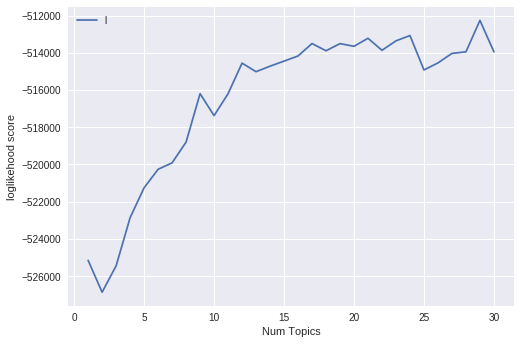

In [0]:
import matplotlib.pyplot as plt

#set x asis from 1-31
limit=31; start=1; step=1;
xaxis = range(start, limit, step)

#create plot
plt.plot(xaxis, loglikehood_lda)

#give label to xasis
plt.xlabel("Num Topics")

#give lavel to yaxis
plt.ylabel("loglikehood score")

#give legend
plt.legend("loglikehood_values", loc='best')

#if you want to save figure
plt.savefig("loglikehood_lda_30topics", frameon = True)

STEP 10: get the topic again, this time using the optimum number of topic

In [0]:
#set how many words do you want to get
n_top_words = 12

#enumerate each topic
for topic_number, all_words_in_this_topic in enumerate(topic_word):

  #sort the index of all words in each topic 
  sort_all_words = np.argsort(all_words_in_this_topic)[::-1]
  
  #get the index of top words[:n_top_words]
  sort_top_words = sort_all_words[:n_top_words]
           
  #get top words
  top_words = np.array(vocab)[sort_top_words]
  
  #print each topic
  print('Topic {}: {}'.format(topic_number+1, ' '.join(top_words)))
  topwords_dict["Topic "+str(topic_number+1)]= ','.join(top_words)   



STEP 11: export the topic dictionary into an excel file, then name each topic

In [0]:
toExcel = pd.DataFrame.from_dict(topwords_dict,orient = 'index', columns = ["topwords"])
toExcel.to_excel("n_topics topic modelling.xlsx", index=True)